# Let's Begin

In [1]:
#Import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier


In [2]:
data = pd.read_csv("../input/mushroom-classification/mushrooms.csv")

In [3]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Preprocessing

In [4]:
mappings = list()

encoder = LabelEncoder()

for column in range(len(data.columns)) : 
    data[data.columns[column]] = encoder.fit_transform(data[data.columns[column]])
    mappings_dict = {index: label for index, label in enumerate (encoder.classes_)}
    mappings.append(mappings_dict)

In [5]:
mappings

[{0: 'e', 1: 'p'},
 {0: 'b', 1: 'c', 2: 'f', 3: 'k', 4: 's', 5: 'x'},
 {0: 'f', 1: 'g', 2: 's', 3: 'y'},
 {0: 'b',
  1: 'c',
  2: 'e',
  3: 'g',
  4: 'n',
  5: 'p',
  6: 'r',
  7: 'u',
  8: 'w',
  9: 'y'},
 {0: 'f', 1: 't'},
 {0: 'a', 1: 'c', 2: 'f', 3: 'l', 4: 'm', 5: 'n', 6: 'p', 7: 's', 8: 'y'},
 {0: 'a', 1: 'f'},
 {0: 'c', 1: 'w'},
 {0: 'b', 1: 'n'},
 {0: 'b',
  1: 'e',
  2: 'g',
  3: 'h',
  4: 'k',
  5: 'n',
  6: 'o',
  7: 'p',
  8: 'r',
  9: 'u',
  10: 'w',
  11: 'y'},
 {0: 'e', 1: 't'},
 {0: '?', 1: 'b', 2: 'c', 3: 'e', 4: 'r'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'f', 1: 'k', 2: 's', 3: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'b', 1: 'c', 2: 'e', 3: 'g', 4: 'n', 5: 'o', 6: 'p', 7: 'w', 8: 'y'},
 {0: 'p'},
 {0: 'n', 1: 'o', 2: 'w', 3: 'y'},
 {0: 'n', 1: 'o', 2: 't'},
 {0: 'e', 1: 'f', 2: 'l', 3: 'n', 4: 'p'},
 {0: 'b', 1: 'h', 2: 'k', 3: 'n', 4: 'o', 5: 'r', 6: 'u', 7: 'w', 8: 'y'},
 {0: 'a', 1: 'c', 2: 'n', 3: 's', 4: 'v', 5: 'y

In [6]:
Y = data['class']
X = data.drop('class', axis = 1)


In [7]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [8]:
X_train, X_test, Y_train , Y_test = train_test_split(X, Y , train_size = 0.8 )

# Model Selection

In [9]:
log_model = LogisticRegression( )
svm_model = SVC( C = 1, kernel = 'rbf')
nn_model = MLPClassifier(hidden_layer_sizes= (128, 128))

# Training

In [10]:
np.sum(Y)/len(Y)

0.48202855736090594

In [11]:
log_model.fit(X_train , Y_train)
svm_model.fit(X_train , Y_train)
nn_model.fit(X_train , Y_train)

MLPClassifier(hidden_layer_sizes=(128, 128))

In [12]:
print(f"--- Logistic Regression: {log_model.score(X_test,Y_test)}")
print(f"Support Vector Machine : {svm_model.score(X_test,Y_test)}")
print(f"--------Neural Network : {nn_model.score(X_test,Y_test)}")

--- Logistic Regression: 0.9587692307692308
Support Vector Machine : 1.0
--------Neural Network : 1.0


In [13]:
X_test.shape

(1625, 22)

# Visualization

<AxesSubplot:>

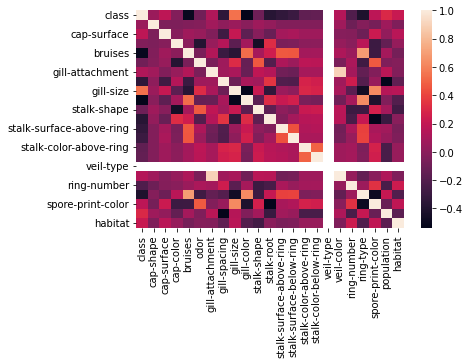

In [14]:
corr = data.corr()

sns.heatmap(corr)

# Result 
**Astounding results, 100% accuracy with Support Vector Machine and Neural Network.**